<a href="https://colab.research.google.com/github/jeevalahari/Sugar-Cosmetics-Analytics/blob/main/Sugar-Cosmetics-Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**💄Sugar Cosmetics Analytics Project**
    
    Welcome! This notebook includes:
    -Data cleaning and EDA
    -Business  insights for cosmetics retail
    -Dashboard planning

📚For a quick project overview,check out the [README.md] https://github.com/jeevalahari/Sugar-Cosmetics-Analytics/blob/main/README.md

✅ Dataset loaded successfully!

First 5 rows:
   product_id                         product_name    category  price  rating  \
0           1  Matte Attack Transferproof Lipstick    lipstick    699     4.5   
1           2         Ace Of Face Foundation Stick  foundation    799     4.3   
2           3         Kohl Of Honour Intense Kajal  eye makeup    249     4.6   
3           4          Contour De Force Mini Blush       blush    349     4.4   
4           5        Smudge Me Not Liquid Lipstick    lipstick    499     4.2   

   review_count          shade availability    platform  
0          1200      Tan Halen     in stock       nykaa  
1           944     Chococcino     in stock      amazon  
2          1800       Blackout     in stock  sugar site  
3           620     Peach Peak     in stock       nykaa  
4          2100  Drop Dead Red     in stock      amazon  

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (tot

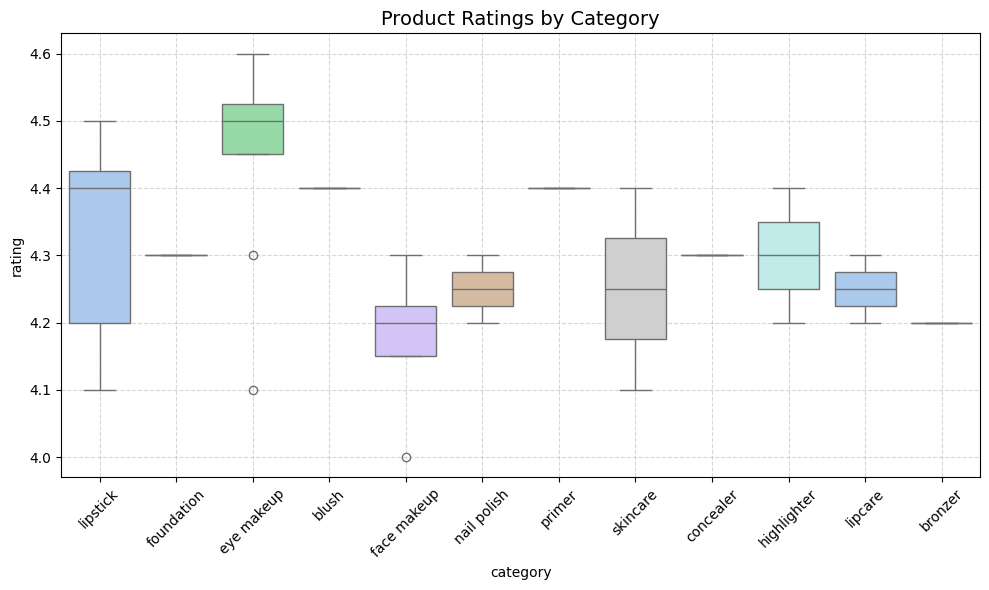

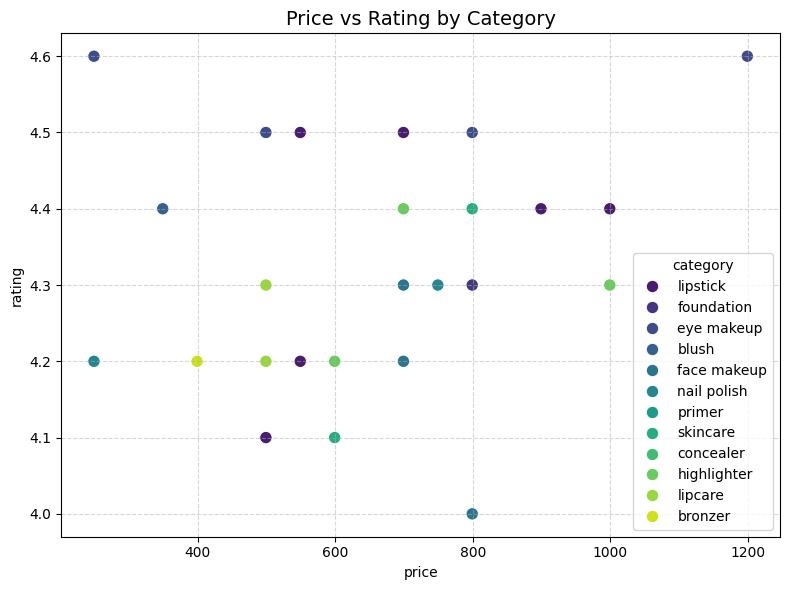


Average Rating by Category:
category
eye makeup     4.4500
blush          4.4000
primer         4.4000
lipstick       4.3375
foundation     4.3000
concealer      4.3000
highlighter    4.3000
nail polish    4.2500
skincare       4.2500
lipcare        4.2500
bronzer        4.2000
face makeup    4.1750
Name: rating, dtype: float64

✅ Cleaned dataset saved to: /content/sugar_cleaned.csv


In [ ]:

# ---------------------------------------
# Sugar Cosmetics Data Cleaning & EDA
# ---------------------------------------

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Step 2: Load Dataset
try:
    # Use the correct file path
    df = pd.read_csv('/content/sugar_dataset.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please check the path.")
    # Exit or handle the error appropriately if the file is not found
    # For this example, we'll assume the file exists at the correct path after correction
    # You might want to add sys.exit() or raise an exception in a real application

# Step 3: Preview the Data
# Check if df is defined before using it
if 'df' in locals():
    print("\nFirst 5 rows:")
    print(df.head())

    # Step 4: Basic Info and Cleanup
    print("\nData types and missing values:")
    print(df.info())

    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Fill or drop missing values safely
    if 'rating' in df.columns:
        df['rating'].fillna(df['rating'].mean(), inplace=True)

    if 'review_count' in df.columns:
        df['review_count'].fillna(0, inplace=True)

    # Step 5: Convert Data Types if Needed
    if 'price' in df.columns:
        df['price'] = pd.to_numeric(df['price'], errors='coerce')

    if 'review_count' in df.columns:
        df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce')

    print("\nData types after conversion:")
    print(df.dtypes)

    # Step 6: Handle Duplicates
    if 'product_name' in df.columns:
        duplicates = df[df.duplicated(subset=['product_name'], keep=False)]
        print(f"\nNumber of duplicate product names: {len(duplicates)}")
        if len(duplicates) > 0:
            print("Duplicate entries:")
            print(duplicates[['product_name', 'category']])
        df.drop_duplicates(subset=['product_name'], inplace=True)

    # Step 7: Summary Statistics
    print("\nSummary statistics:")
    print(df.describe())

    # Step 8: Top-Rated Products
    if {'product_name', 'category', 'rating'}.issubset(df.columns):
        top_rated = df.sort_values(by='rating', ascending=False).head(10)
        print("\nTop 10 Rated Products:")
        print(top_rated[['product_name', 'category', 'price', 'rating', 'review_count']])

    # Step 9: Visualization - Product Ratings by Category
    if {'category', 'rating'}.issubset(df.columns):
        plt.figure(figsize=(10,6))
        sns.boxplot(x='category', y='rating', data=df, palette='pastel')
        plt.title('Product Ratings by Category', fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # Step 10: Visualization - Price vs Rating
    if {'price', 'rating', 'category'}.issubset(df.columns):
        plt.figure(figsize=(8,6))
        sns.scatterplot(x='price', y='rating', hue='category', data=df, palette='viridis', s=80)
        plt.title('Price vs Rating by Category', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    # Step 11: Business Insight - Average Rating by Category
    if {'category', 'rating'}.issubset(df.columns):
        avg_rating_by_cat = df.groupby('category')['rating'].mean().sort_values(ascending=False)
        print("\nAverage Rating by Category:")
        print(avg_rating_by_cat)

    # Step 12: Save Cleaned Data
    output_path = '/content/sugar_cleaned.csv'
    df.to_csv(output_path, index=False)
    print(f"\n✅ Cleaned dataset saved to: {output_path}")
else:
    print("DataFrame 'df' was not created due to file loading error.")

In [ ]:
# 🚀 SUGAR COSMETICS ETL PIPELINE
# -----------------------------------------------

# Step 1: Import libraries
import pandas as pd
import os

# Step 2: Define ETL functions

def extract_data(file_path):
    """Extract raw data from the CSV file"""
    print("📥 Extracting data from source...")

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ File not found: {file_path}")

    df = pd.read_csv(file_path)
    print(f"✅ Data extracted successfully! Shape: {df.shape}")
    return df


def transform_data(df):
    """Clean and transform the dataset"""
    print("🧹 Cleaning and transforming data...")

    # Remove duplicates
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    print(f"🧾 Removed {before - after} duplicate rows")

    # Handle missing values
    if 'rating' in df.columns:
        df['rating'] = df['rating'].fillna(df['rating'].mean())

    if 'review_count' in df.columns:
        df['review_count'] = df['review_count'].fillna(0)

    # Convert data types
    for col in ['price', 'review_count']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    print("✅ Data transformation complete!")
    return df


def load_data(df, output_path):
    """Load the cleaned data to a new CSV file"""
    df.to_csv(output_path, index=False)
    print(f"💾 Cleaned data saved successfully to: {output_path}")


# Step 3: Main ETL pipeline execution
def main():
    print("🚀 Starting Sugar Cosmetics ETL Pipeline")

    # ✅ Paths for Colab
    input_path = "/content/sugar_dataset.csv"          # Input dataset path
    output_path = "/content/sugar_cleaned_etl.csv"     # Output cleaned dataset

    # ETL steps
    df = extract_data(input_path)
    df = transform_data(df)
    load_data(df, output_path)

    print("🎉 ETL Pipeline executed successfully!")


# Step 4: Run the pipeline
if __name__ == "__main__":
    main()


🚀 Starting Sugar Cosmetics ETL Pipeline
📥 Extracting data from source...
✅ Data extracted successfully! Shape: (40, 9)
🧹 Cleaning and transforming data...
🧾 Removed 0 duplicate rows
✅ Data transformation complete!
💾 Cleaned data saved successfully to: /content/sugar_cleaned_etl.csv
🎉 ETL Pipeline executed successfully!


In [ ]:
df_cleaned = pd.read_csv("/content/sugar_cleaned_etl.csv")
df_cleaned.head()


,product_id,product_name,category,price,rating,review_count,shade,availability,platform
0,1,Matte Attack Transferproof Lipstick,lipstick,699,4.5,1200,Tan Halen,in stock,nykaa
1,2,Ace Of Face Foundation Stick,foundation,799,4.3,944,Chococcino,in stock,amazon
2,3,Kohl Of Honour Intense Kajal,eye makeup,249,4.6,1800,Blackout,in stock,sugar site
3,4,Contour De Force Mini Blush,blush,349,4.4,620,Peach Peak,in stock,nykaa
4,5,Smudge Me Not Liquid Lipstick,lipstick,499,4.2,2100,Drop Dead Red,in stock,amazon


In [ ]:
df.to_csv("sugar_cleaned_etl.csv", index=False)
